In [922]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [923]:
%%markdown
# Read the CSV

# Read the CSV


In [924]:
df = pd.read_csv('spotify-data.csv')

In [925]:
%%markdown
# Describe the dataset

# Describe the dataset


In [926]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key               16

In [927]:
df.describe(include='all')

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
count,169909,169909,169909,1.699090e+05,169909,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
unique,169909,132939,33375,NaN,10882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6KbQ3uYMLKb5jDxLF7wYDD,Summertime,['Эрнест Хемингуэй'],NaN,1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,62,1215,NaN,1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.314062e+05,NaN,1977.223231,0.493214,0.538150,0.488593,0.161937,0.206690,-11.370289,0.094058,116.948017,0.532095,0.708556,5.200519,31.556610,0.084863
std,NaN,NaN,NaN,1.213219e+05,NaN,25.593168,0.376627,0.175346,0.267390,0.309329,0.176796,5.666765,0.149937,30.726937,0.262408,0.454429,3.515257,21.582614,0.278679
min,NaN,NaN,NaN,5.108000e+03,NaN,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.710400e+05,NaN,1957.000000,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,0.034900,93.516000,0.322000,0.000000,2.000000,12.000000,0.000000
50%,NaN,NaN,NaN,2.086000e+05,NaN,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.778000,0.544000,1.000000,5.000000,33.000000,0.000000
75%,NaN,NaN,NaN,2.629600e+05,NaN,1999.000000,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,0.075400,135.712000,0.749000,1.000000,8.000000,48.000000,0.000000


In [928]:
%%markdown
# Fix data

# Fix data


In [929]:
%%markdown
## Normalize the release date

## Normalize the release date


In [930]:
def parse_release_date(row):
    d = row['release_date']
    y = row['year']
    if '/' in d:    
        date_parts = d.split('/')
        return datetime.date(int(y), int(date_parts[0]), int(date_parts[1]))
    elif '-' in d: # Date is year-month
        date_parts = d.split('-')
        return datetime.date(int(y), int(date_parts[1]), 1)
    else: # Date is like year
        return datetime.date(int(y), 1, 1)
        

In [931]:
df['new_release_date'] = df[['release_date', 'year']].apply(parse_release_date, axis=1)

In [932]:
df.drop(columns=['release_date'], inplace=True)

In [933]:
%%markdown
## Drop the 'id' and 'name' column

## Drop the 'id' and 'name' column


In [934]:
df.drop(columns=['id'], inplace=True)

In [935]:
%%markdown
## Add 'artist_count' column and drop 'artists' column

## Add 'artist_count' column and drop 'artists' column


In [936]:
# df['artist_count'] = df['artists'].apply(lambda a : len(a.split(',')))

In [937]:
# df.drop(columns=['artists'], inplace=True)

In [938]:
%%markdown
## Remove the 'year' column as it is the same as the 'release_date_year' one

## Remove the 'year' column as it is the same as the 'release_date_year' one


In [939]:
df.drop(columns=['year'], inplace=True)

In [940]:
%%markdown
Correlations to **popularity**
- *release_date_year* seems to be highly correlated
- *energy* and *loudness* seems to be reasonably correlated
- *acousticness* seems to be negatively correlated to *popularity*

Correlations to **popularity**
- *release_date_year* seems to be highly correlated
- *energy* and *loudness* seems to be reasonably correlated
- *acousticness* seems to be negatively correlated to *popularity*


In [941]:
df['release_year'] = df['new_release_date'].apply(lambda d : d.year)

In [1116]:
%%markdown
## How to get the most popular songs by year

## How to get the most popular songs by year


In [1098]:
popular_songs = []
for y in df['release_year'].unique().tolist():
    popular_songs.append(df[df['release_year'] == y].sort_values(by='popularity', ascending=False).head(1)[['release_year', 'name', 'artists', 'popularity']])

popular_songs_df = pd.concat(popular_songs, ignore_index=True)

In [1114]:
popular_songs_df[popular_songs_df['release_year'] == 1986]

,release_year,name,artists,popularity
47,1986,Livin' On A Prayer,['Bon Jovi'],83


In [1120]:
%%markdown
# Predict popularity based on the existing features

# Predict popularity based on the existing features


In [1122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              169909 non-null  object 
 1   artists           169909 non-null  object 
 2   duration_ms       169909 non-null  int64  
 3   acousticness      169909 non-null  float64
 4   danceability      169909 non-null  float64
 5   energy            169909 non-null  float64
 6   instrumentalness  169909 non-null  float64
 7   liveness          169909 non-null  float64
 8   loudness          169909 non-null  float64
 9   speechiness       169909 non-null  float64
 10  tempo             169909 non-null  float64
 11  valence           169909 non-null  float64
 12  mode              169909 non-null  int64  
 13  key               169909 non-null  int64  
 14  popularity        169909 non-null  int64  
 15  explicit          169909 non-null  int64  
 16  new_release_date  16

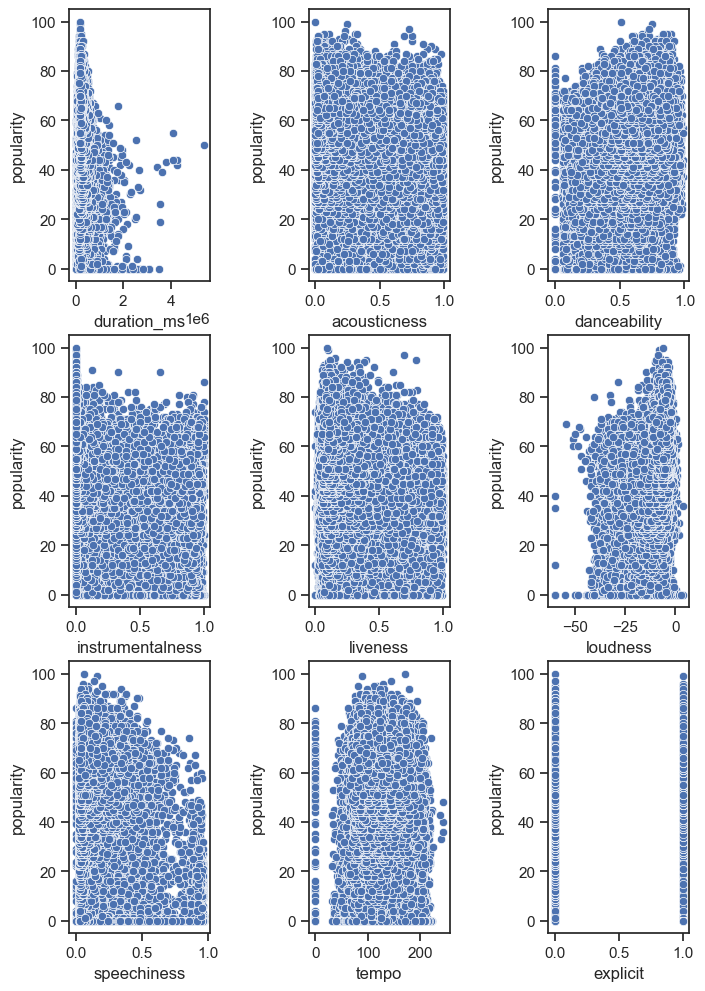

In [1180]:
fig, axes = plt.subplots(nrows=3, ncols=3)

sns.scatterplot(df, x='duration_ms', y='popularity', ax=axes[0][0])
sns.scatterplot(df, x='acousticness', y='popularity', ax=axes[0][1])
sns.scatterplot(df, x='danceability', y='popularity', ax=axes[0][2])

sns.scatterplot(df, x='instrumentalness', y='popularity', ax=axes[1][0])
sns.scatterplot(df, x='liveness', y='popularity', ax=axes[1][1])
sns.scatterplot(df, x='loudness', y='popularity', ax=axes[1][2])

sns.scatterplot(df, x='speechiness', y='popularity', ax=axes[2][0])
sns.scatterplot(df, x='tempo', y='popularity', ax=axes[2][1])
sns.scatterplot(df, x='explicit', y='popularity', ax=axes[2][2])

fig.set_figheight(12)
fig.set_figwidth(8)
fig.subplots_adjust(hspace=0.2, wspace=0.7)


In [1124]:
%%markdown
## Remove non-needed features

## Remove non-needed features


In [1188]:
# df.drop(['name', 'artists', 'new_release_date', 'release_year', 'key', 'mode', 'new_release_date'], axis=1, inplace=True)

In [1196]:
df.corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
energy              0.497488
loudness            0.466546
danceability        0.221077
explicit            0.214044
tempo               0.135047
duration_ms         0.063292
valence             0.009327
liveness           -0.075293
speechiness        -0.135707
instrumentalness   -0.299829
acousticness       -0.593345
Name: popularity, dtype: float64

In [1200]:
%%markdown
## Remove non-correlated features with 'popularity'

## Remove non-correlated features with 'popularity'


In [1202]:
df.drop(['tempo', 'duration_ms', 'valence', 'liveness', 'speechiness'], axis=1, inplace=True)

In [1260]:
df.head()

,acousticness,danceability,energy,instrumentalness,loudness,popularity,explicit
0,0.995,0.708,0.1950,0.563,-12.428,0,0
1,0.994,0.379,0.0135,0.901,-28.454,0,0
2,0.604,0.749,0.2200,0.000,-19.924,0,0
3,0.995,0.781,0.1300,0.887,-14.734,0,0
4,0.990,0.210,0.2040,0.908,-16.829,1,0


In [1210]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [1216]:
scaler = MinMaxScaler()

# Fit and transform the data
scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [1254]:
scaled_df.head()

,acousticness,danceability,energy,instrumentalness,loudness,popularity,explicit
0,0.998996,0.716599,0.1950,0.563,0.745000,0.00,0.0
1,0.997992,0.383603,0.0135,0.901,0.494026,0.00,0.0
2,0.606426,0.758097,0.2200,0.000,0.627609,0.00,0.0
3,0.998996,0.790486,0.1300,0.887,0.708887,0.00,0.0
4,0.993976,0.212551,0.2040,0.908,0.676079,0.01,0.0


In [1220]:
X = scaled_df.drop('popularity', axis=1)
y = scaled_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1232]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [1234]:
model.fit(X_train, y_train)

LinearRegression()

In [1236]:
y_pred = model.predict(X_test)

In [1248]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

name = 'Linear regression'
mse = mean_squared_error(y_test, y_pred)
print(f'{name}: Mean Squared Error = {mse:.4f}')
print('\n')
mae = mean_absolute_error(y_test, y_pred)
print(f'{name}: Mean Absolute Error = {mae:.4f}')

Linear regression: Mean Squared Error = 0.0285


Linear regression: Mean Absolute Error = 0.1361


In [1252]:
X_test.shape

(50973, 6)